In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader,Dataset
import torch.optim as optim
import torchvision.transforms.functional as TF
from torchinfo import summary

import numpy as np
from numpy import linalg as LA
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [2]:

def load_3channel_img(file_path):
    with open(file_path) as f:
        lines = f.readlines()
    imgs, labels = [], []
    # imgs = torch.Tensor()
    # labels = []
    target_size=(128, 128)
    print('Total train images:', len(lines))
    for i in tqdm(range(len(lines)), desc="Loading images"):
    # for i in tqdm(range(100), desc="Loading images"):
        fn, label = lines[i].strip().split(' ')
        im1 = cv2.imread(fn)
        # 如果需要進行影像處理，請在這裡添加相應的處理步驟
        im1 = cv2.resize(im1, target_size)

        # 轉換成 PyTorch Tensor
        im1_tensor = torch.from_numpy(im1.transpose(2, 0, 1))  # 將通道維度移動到最前面
        
        imgs.append(im1_tensor) 
        labels.append(int(label))

    imgs_tensor = torch.stack(imgs)  # 將列表中的 Tensor 堆疊成一個整體 Tensor
    labels_tensor = torch.tensor(labels)

    return imgs_tensor, labels_tensor

x_3c, y_3c = load_3channel_img('train.txt')
val_x_3c, val_y_3c = load_3channel_img('val.txt')
tx_3c, ty_3c = load_3channel_img('test.txt')


def load_2channel_img(file_path,channel = "RG"):
    with open(file_path) as f:
        lines = f.readlines()
    imgs, labels = [], []
    # imgs = torch.Tensor()
    # labels = []
    target_size=(128, 128)
    print('Total train images:', len(lines))
    for i in tqdm(range(len(lines)), desc="Loading images"):
    # for i in tqdm(range(100), desc="Loading images"):
        fn, label = lines[i].strip().split(' ')
        im1 = cv2.imread(fn)
        # 如果需要進行影像處理，請在這裡添加相應的處理步驟
        im1 = cv2.resize(im1, target_size)

        if channel == "RG":
            im1_rg = im1[:, :, 0:2]
            im1_rg_tensor = torch.from_numpy(im1_rg.transpose(2, 0, 1))
            imgs.append(im1_rg_tensor)
            labels.append(int(label))
            # print(im1_rg.shape)
        elif channel == "GB":
            im1_gb = im1[:, :, 1:3]
            im1_gb_tensor = torch.from_numpy(im1_gb.transpose(2, 0, 1))
            imgs.append(im1_gb_tensor)
            labels.append(int(label))
            # print(im1_gb.shape)
        else:
            im1_rb = im1[:, :, [0, 2]]
            im1_rb_tensor = torch.from_numpy(im1_rb.transpose(2, 0, 1))
            imgs.append(im1_rb_tensor)
            labels.append(int(label))
            # print(im1_rb.shape)


    imgs_tensor = torch.stack(imgs)  # 將列表中的 Tensor 堆疊成一個整體 Tensor
    labels_tensor = torch.tensor(labels)

    return imgs_tensor, labels_tensor

x_RG, y_RG = load_2channel_img('train.txt',"RG")
val_x_RG, val_y_RG = load_2channel_img('val.txt',"RG")
tx_RG, ty_RG = load_2channel_img('test.txt',"RG")
x_GB, y_GB = load_2channel_img('train.txt',"GB")
val_x_GB, val_y_GB = load_2channel_img('val.txt',"GB")
tx_GB, ty_GB = load_2channel_img('test.txt',"GB")
x_RB, y_RB = load_2channel_img('train.txt',"RB")
val_x_RB, val_y_RB = load_2channel_img('val.txt',"RB")
tx_RB, ty_RB = load_2channel_img('test.txt',"RB")

def load_1channel_img(file_path,channel = "R"):
    with open(file_path) as f:
        lines = f.readlines()
    imgs, labels = [], []
    # imgs = torch.Tensor()
    # labels = []
    target_size=(128, 128)
    print('Total train images:', len(lines))
    for i in tqdm(range(len(lines)), desc="Loading images"):
    # for i in tqdm(range(100), desc="Loading images"):
        fn, label = lines[i].strip().split(' ')
        im1 = cv2.imread(fn)
        # 如果需要進行影像處理，請在這裡添加相應的處理步驟
        im1 = cv2.resize(im1, target_size)

        # 把圖片RGB都拆開
        im1_r, im1_g, im1_b = im1[:, :, 0], im1[:, :, 1], im1[:, :, 2]
        if channel == "R":
            im1_r = np.expand_dims(im1_r, axis=2)
            im1_r_tensor = torch.from_numpy(im1_r.transpose(2, 0, 1))
            imgs.append(im1_r_tensor)
            labels.append(int(label))
        elif channel == "G":
            im1_g = np.expand_dims(im1_g, axis=2)
            im1_g_tensor = torch.from_numpy(im1_g.transpose(2, 0, 1))
            imgs.append(im1_g_tensor)
            labels.append(int(label))
        else:
            im1_b = np.expand_dims(im1_b, axis=2)
            im1_b_tensor = torch.from_numpy(im1_b.transpose(2, 0, 1))
            imgs.append(im1_b_tensor)
            labels.append(int(label))
    
    imgs_tensor = torch.stack(imgs)  # 將列表中的 Tensor 堆疊成一個整體 Tensor
    labels_tensor = torch.tensor(labels)

    return imgs_tensor, labels_tensor

x_R, y_R = load_1channel_img('train.txt',"R")
val_x_R, val_y_R = load_1channel_img('val.txt',"R")
tx_R, ty_R = load_1channel_img('test.txt',"R")
x_G, y_G = load_1channel_img('train.txt',"G")
val_x_G, val_y_G = load_1channel_img('val.txt',"G")
tx_G, ty_G = load_1channel_img('test.txt',"G")
x_B, y_B = load_1channel_img('train.txt',"B")
val_x_B, val_y_B = load_1channel_img('val.txt',"B")
tx_B, ty_B = load_1channel_img('test.txt',"B")

Total train images: 63325


Loading images:   0%|          | 0/63325 [00:00<?, ?it/s]

Loading images: 100%|██████████| 63325/63325 [00:24<00:00, 2611.43it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2826.22it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2849.78it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:22<00:00, 2833.17it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2836.60it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2859.72it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:23<00:00, 2726.16it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 1712.27it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2781.70it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:24<00:00, 2580.77it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2783.10it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2794.51it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:23<00:00, 2665.71it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2832.93it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2858.82it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:22<00:00, 2771.83it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2824.54it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2860.17it/s]


Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:24<00:00, 2586.56it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2843.76it/s]


Total train images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2859.95it/s]


In [3]:
class attention2d(nn.Module):
    def __init__(self, in_planes, ratios, K, temperature, init_weight=True):
        super(attention2d, self).__init__()
        assert temperature%3==1
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        if in_planes!=3:
            hidden_planes = int(in_planes*ratios)+1
        else:
            hidden_planes = K

        self.fc1 = nn.Conv2d(in_planes, hidden_planes, 1, bias=False)
        # self.bn = nn.BatchNorm2d(hidden_planes)
        self.fc2 = nn.Conv2d(hidden_planes, K, 1, bias=True)
        self.temperature = temperature
        if init_weight:
            self._initialize_weights()


    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            if isinstance(m ,nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def updata_temperature(self):
        if self.temperature!=1:
            self.temperature -=3
            print('Change temperature to:', str(self.temperature))


    def forward(self, x):
        x = self.avgpool(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x).view(x.size(0), -1)
        return F.softmax(x/self.temperature, 1)

    
class AdaptiveChannelConvModule(nn.Module):
    def __init__(self, out_channels, kernel_size):
        super(AdaptiveChannelConvModule, self).__init__()
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.conv = nn.Conv2d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.conv_pad = nn.Conv2d(2, out_channels//2, kernel_size, padding=kernel_size // 2)
        # self.pool = nn.AdaptiveAvgPool2d((1))
        # self.attention = attention2d()

    def forward(self, x):
        batch_size, in_channels, height, width = x.shape
        
        # 使用線性層將輸入調整到固定的通道數
        if in_channels < self.out_channels:
            
            x_avgpooled = x.mean(dim=1, keepdim=True)
            x_maxpooled = x.max(dim=1, keepdim=True).values
            x_pad = torch.cat([x_avgpooled, x_maxpooled], dim=1)
            # x_pad = torch.cat([x, x_pad], dim=1)
            x_pad = self.conv_pad(x_pad)
            # x_pad = torch.cat([x_pad, x_conv_pad], dim=1)
            x = torch.cat([x, x_pad], dim=1)

            if x.shape[1] < self.out_channels:
                # print("asasdasd")
                x_avgpooled = x.mean(dim=1, keepdim=True)
                x_maxpooled = x.max(dim=1, keepdim=True).values
                x_avgpooled_repeated = x_avgpooled.repeat(1, (self.out_channels - x.shape[1]) // 2, 1, 1)
                x = torch.cat([x, x_avgpooled_repeated], dim=1)
                x_maxpooled = x_maxpooled.repeat(1, self.out_channels - x.shape[1], 1, 1)
                x = torch.cat([x, x_maxpooled], dim=1) 

            # noise_avg = torch.randn_like(x_avgpooled) * 0.1  # 生成与 x_avgpooled 相同形状的噪声
            # noise_max = torch.randn_like(x_maxpooled) * 0.1  # 生成与 x_maxpooled 相同形状的噪声

            # # x_avgpooled_noisy = x_avgpooled + noise_avg
            # # x_maxpooled_noisy = x_maxpooled + noise_max
            # # print(x_avgpooled.shape)
            # # print(x_maxpooled.shape)
            # x_avgpooled_repeated = x_avgpooled.repeat(1, (self.out_channels- in_channels) // 2, 1, 1)
            # x_maxpooled = x_maxpooled.repeat(1, self.out_channels - in_channels - x_avgpooled_repeated.shape[1], 1, 1)
            # x = torch.cat([x, x_avgpooled_repeated], dim=1)
            # x = torch.cat([x, x_maxpooled], dim=1)
            
            # while x.shape[1] < self.out_channels:
            #     random_index = random.randint(0, x.shape[1] - 1)
            #     angle = random.uniform(0,30)
            #     scale = random.uniform(0.8, 1.0)
                
            #     x_rotate_featuremap = TF.rotate(x[:,random_index,:,:],angle)
            #     x_rotate_featuremap =  x_rotate_featuremap.unsqueeze(1)
            #     x_resizecrop_featuremap = TF.resized_crop(x[:,random_index,:,:], top=0, left=0, height=int(height * scale), width=int(width * scale), size=(height, width))
            #     x_resizecrop_featuremap =  x_resizecrop_featuremap.unsqueeze(1)
            #     x = torch.cat([x, x_rotate_featuremap], dim=1)
            #     x = torch.cat([x, x_resizecrop_featuremap], dim=1)
                # print(x.shape)
            




        if x.shape[1] > self.out_channels:
                x = x[:, :self.out_channels, :, :]
    
        out = self.conv(x)
        
        # 進行標準卷積操作
        # out = self.conv(x)
        return out

# 用法示例
model = AdaptiveChannelConvModule(out_channels=64, kernel_size=3)
input_image = torch.randn(8, 3, 64, 64)  # 任意通道特徵圖
output = model(input_image)
print(output.shape)  # 應為 (1, 64, 64, 64)

class Dynamic_conv2d(nn.Module):
    def __init__(self,out_planes, kernel_size, ratio=0.25, stride=1, padding=1, dilation=1, groups=1, bias=True, K=8,temperature=34, init_weight=True):
        super(Dynamic_conv2d, self).__init__()
        # assert in_planes%groups==0
        # self.in_planes = in_planes
        self.out_planes = out_planes
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.dilation = dilation
        self.groups = groups
        self.bias = bias
        self.K = K
        self.ADC = AdaptiveChannelConvModule(out_channels=out_planes, kernel_size=kernel_size)
                                            #  augmentations= RandomAugmentations(rotation_range=(0, 30), crop_scale=(0.8, 1.0), jitter_params=(0.4, 0.4, 0.4, 0.4)))

        self.attention = attention2d(out_planes, ratio, K, temperature)

        self.weight = nn.Parameter(torch.randn(K, out_planes, out_planes//groups, kernel_size, kernel_size), requires_grad=True)

    
        if bias:
            self.bias = nn.Parameter(torch.zeros(K, out_planes))
        else:
            self.bias = None
            
        if init_weight:
            self._initialize_weights()

        #TODO 初始化
    def _initialize_weights(self):
        for i in range(self.K):
            nn.init.kaiming_uniform_(self.weight[i])


    def update_temperature(self):
        self.attention.updata_temperature()

    def forward(self, x):#将batch视作维度变量，进行组卷积，因为组卷积的权重是不同的，动态卷积的权重也是不同的
        batch_size, in_planes, height, width = x.size()
        # print(in_planes)
        # print(x.shape)
        x = self.ADC(x)
        # print("done adc")
        # print(x.shape)
        softmax_attention = self.attention(x)
            
        
        # print(x.shape)
        x = x.view(1, -1, height, width)# 变化成一个维度进行组卷积
        weight = self.weight.view(self.K, -1)
        # 动态卷积的权重的生成， 生成的是batch_size个卷积参数（每个参数不同）
        aggregate_weight = torch.mm(softmax_attention, weight).view(batch_size*self.out_planes, self.out_planes//self.groups, self.kernel_size, self.kernel_size)
        # print(aggregate_weight.shape)
        if self.bias is not None:
            aggregate_bias = torch.mm(softmax_attention, self.bias).view(-1)
            # print(aggregate_weight.shape)
            # print(x.shape)
            output = F.conv2d(x, weight=aggregate_weight, bias=aggregate_bias, stride=self.stride, padding=self.padding,
                              dilation=self.dilation, groups=self.groups*batch_size)
        else:
            output = F.conv2d(x, weight=aggregate_weight, bias=None, stride=self.stride, padding=self.padding,
                              dilation=self.dilation, groups=self.groups * batch_size)

        output = output.view(batch_size, self.out_planes, output.size(-2), output.size(-1))
        return output

torch.Size([8, 64, 64, 64])


In [4]:
# # 測試
# # x1 = torch.randn(64, 3, 128, 128)  # 一個RGB圖像
# dynamic_conv = Dynamic_conv2d(out_planes=64, kernel_size=3,stride = 1)
# # out1 = dynamic_conv(x1)
# # print("done 1")
# # print(out1.shape)  # 應輸出 torch.Size([1, 64, 224, 224])

# x2 = torch.randn(64, 128, 128, 128)  # 一個灰階圖像
# out2 = dynamic_conv(x2)
# print("done")
# print(out2.shape)  # 應輸出 torch.Size([1, 64, 224, 224])

# # x3 = torch.randn(64, 2, 128, 128)  # 一個灰階圖像
# # # dynamic_conv = Dynamic_conv2d(out_planes=32, kernel_size=3,stride = 1)
# # out2 = dynamic_conv(x3)
# # print(out2.shape)  # 應輸出 torch.Size([1, 64, 224, 224])

In [5]:
# RG
y_RG_tensor = torch.nn.functional.one_hot(y_RG, num_classes=50)
val_y_RG_tensor = torch.nn.functional.one_hot(val_y_RG, num_classes=50)
ty_RG_tensor = torch.nn.functional.one_hot(ty_RG, num_classes=50)

# RB
y_RB_tensor = torch.nn.functional.one_hot(y_RB, num_classes=50)
val_y_RB_tensor = torch.nn.functional.one_hot(val_y_RB, num_classes=50)
ty_RB_tensor = torch.nn.functional.one_hot(ty_RB, num_classes=50)

# GB
y_GB_tensor = torch.nn.functional.one_hot(y_GB, num_classes=50)
val_y_GB_tensor = torch.nn.functional.one_hot(val_y_GB, num_classes=50)
ty_GB_tensor = torch.nn.functional.one_hot(ty_GB, num_classes=50)

# R
y_R_tensor = torch.nn.functional.one_hot(y_R, num_classes=50)
val_y_R_tensor = torch.nn.functional.one_hot(val_y_R, num_classes=50)
ty_R_tensor = torch.nn.functional.one_hot(ty_R, num_classes=50)

# G
y_G_tensor = torch.nn.functional.one_hot(y_G, num_classes=50)
val_y_G_tensor = torch.nn.functional.one_hot(val_y_G, num_classes=50)
ty_G_tensor = torch.nn.functional.one_hot(ty_G, num_classes=50)

# B
y_B_tensor = torch.nn.functional.one_hot(y_B, num_classes=50)
val_y_B_tensor = torch.nn.functional.one_hot(val_y_B, num_classes=50)
ty_B_tensor = torch.nn.functional.one_hot(ty_B, num_classes=50)


y_3c_tensor = torch.nn.functional.one_hot(y_3c, num_classes=50)
val_y_3c_tensor = torch.nn.functional.one_hot(val_y_3c, num_classes=50)
ty_3c_tensor = torch.nn.functional.one_hot(ty_3c, num_classes=50)

# RG
train_dataset_RG = TensorDataset(x_RG, y_RG_tensor)
val_dataset_RG = TensorDataset(val_x_RG, val_y_RG_tensor)
test_dataset_RG = TensorDataset(tx_RG, ty_RG_tensor)

# GB
train_dataset_GB = TensorDataset(x_GB, y_GB_tensor)
val_dataset_GB = TensorDataset(val_x_GB, val_y_GB_tensor)
test_dataset_GB = TensorDataset(tx_GB, ty_GB_tensor)

# RB
train_dataset_RB = TensorDataset(x_RB, y_RB_tensor)
val_dataset_RB = TensorDataset(val_x_RB, val_y_RB_tensor)
test_dataset_RB = TensorDataset(tx_RB, ty_RB_tensor)

# R
train_dataset_R = TensorDataset(x_R, y_R_tensor)
val_dataset_R = TensorDataset(val_x_R, val_y_R_tensor)
test_dataset_R = TensorDataset(tx_R, ty_R_tensor)

# G 
train_dataset_G = TensorDataset(x_G, y_G_tensor)
val_dataset_G = TensorDataset(val_x_G, val_y_G_tensor)
test_dataset_G = TensorDataset(tx_G, ty_G_tensor)

# B
train_dataset_B = TensorDataset(x_B, y_B_tensor)
val_dataset_B = TensorDataset(val_x_B, val_y_B_tensor)
test_dataset_B = TensorDataset(tx_B, ty_B_tensor)

# RGB
train_dataset_3c = TensorDataset(x_3c, y_3c_tensor)
val_dataset_3c = TensorDataset(val_x_3c, val_y_3c_tensor)
test_dataset_3c = TensorDataset(tx_3c, ty_3c_tensor)

batch_size = 128  # 可以自行調整 batch size 的大小
shuffle = True   # 是否對資料進行洗牌

# RG
train_RG_loader = DataLoader(train_dataset_RG, batch_size=batch_size, shuffle=shuffle)
val_RG_loader = DataLoader(val_dataset_RG, batch_size=batch_size, shuffle=shuffle)
test_RG_loader = DataLoader(test_dataset_RG, batch_size=batch_size, shuffle=shuffle)

# RB
train_RB_loader = DataLoader(train_dataset_RB, batch_size=batch_size, shuffle=shuffle)
val_RB_loader = DataLoader(val_dataset_RB, batch_size=batch_size, shuffle=shuffle)
test_RB_loader = DataLoader(test_dataset_RB, batch_size=batch_size, shuffle=shuffle)

# GB
train_GB_loader = DataLoader(train_dataset_GB, batch_size=batch_size, shuffle=shuffle)
val_GB_loader = DataLoader(val_dataset_GB, batch_size=batch_size, shuffle=shuffle)
test_GB_loader = DataLoader(test_dataset_GB, batch_size=batch_size, shuffle=shuffle)

# R
train_R_loader = DataLoader(train_dataset_R, batch_size=batch_size, shuffle=shuffle)
val_R_loader = DataLoader(val_dataset_R, batch_size=batch_size, shuffle=shuffle)
test_R_loader = DataLoader(test_dataset_R, batch_size=batch_size, shuffle=shuffle)

# G 
train_G_loader = DataLoader(train_dataset_G, batch_size=batch_size, shuffle=shuffle)
val_G_loader = DataLoader(val_dataset_G, batch_size=batch_size, shuffle=shuffle)
test_G_loader = DataLoader(test_dataset_G, batch_size=batch_size, shuffle=shuffle)

# B 
train_B_loader = DataLoader(train_dataset_B, batch_size=batch_size, shuffle=shuffle)
val_B_loader = DataLoader(val_dataset_B, batch_size=batch_size, shuffle=shuffle)
test_B_loader = DataLoader(test_dataset_B, batch_size=batch_size, shuffle=shuffle)

# RGB
train_3c_loader = DataLoader(train_dataset_3c, batch_size=batch_size, shuffle=shuffle)
val_3c_loader = DataLoader(val_dataset_3c, batch_size=batch_size, shuffle=shuffle)
test_3c_loader = DataLoader(test_dataset_3c, batch_size=batch_size, shuffle=shuffle)



In [6]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # 5层卷积层
        self.conv1 = Dynamic_conv2d(out_planes=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = Dynamic_conv2d(out_planes=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = Dynamic_conv2d(out_planes=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = Dynamic_conv2d(out_planes=256, kernel_size=3, stride=1, padding=1)
        self.conv5 = Dynamic_conv2d(out_planes=512, kernel_size=3, stride=1, padding=1)
        
        # 批归一化层（可选）
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)
        self.bn5 = nn.BatchNorm2d(512)
        
        # 池化层
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # 3层全连接层
        self.fc1 = nn.Linear(512 * 4 * 4 , 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 50)  # 假设有50个类别
        
        # dropout层（可选）
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # 卷积层 + 批归一化 + 激活函数 + 池化
        # print(x.shape)
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # print(x.shape)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.pool(F.relu(self.bn5(self.conv5(x))))
        # print(x.shape)
        # 展平
        x = x.view(x.size(0), -1)
        
        # 全连接层 + 激活函数 + dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

In [7]:
model = CNNModel()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # 檢查是否有 GPU，有則使用 GPU
model.to(device)  # 將模型移動到設備上

CNNModel(
  (conv1): Dynamic_conv2d(
    (ADC): AdaptiveChannelConvModule(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_pad): Conv2d(2, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (attention): attention2d(
      (avgpool): AdaptiveAvgPool2d(output_size=1)
      (fc1): Conv2d(32, 9, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (fc2): Conv2d(9, 8, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (conv2): Dynamic_conv2d(
    (ADC): AdaptiveChannelConvModule(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_pad): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (attention): attention2d(
      (avgpool): AdaptiveAvgPool2d(output_size=1)
      (fc1): Conv2d(64, 17, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (fc2): Conv2d(17, 8, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (conv3): Dynamic_conv2d(
    (ADC): AdaptiveChannelConvModule(
     

In [19]:
summary(model)

Layer (type:depth-idx)                        Param #
CNNModel                                      --
├─Dynamic_conv2d: 1-1                         73,984
│    └─AdaptiveChannelConvModule: 2-1         --
│    │    └─Conv2d: 3-1                       9,248
│    │    └─Conv2d: 3-2                       304
│    └─attention2d: 2-2                       --
│    │    └─AdaptiveAvgPool2d: 3-3            --
│    │    └─Conv2d: 3-4                       288
│    │    └─Conv2d: 3-5                       80
├─Dynamic_conv2d: 1-2                         295,424
│    └─AdaptiveChannelConvModule: 2-3         --
│    │    └─Conv2d: 3-6                       36,928
│    │    └─Conv2d: 3-7                       608
│    └─attention2d: 2-4                       --
│    │    └─AdaptiveAvgPool2d: 3-8            --
│    │    └─Conv2d: 3-9                       1,088
│    │    └─Conv2d: 3-10                      144
├─Dynamic_conv2d: 1-3                         1,180,672
│    └─AdaptiveChannelConvModule: 

In [8]:
def train(model,traindataloader,valdataLoader,criterion,optimizer,traing_acc,val_acc,epoch,channel):
    model.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    
    running_loss = 0.0
    for inputs, labels in tqdm(traindataloader):
        # print(inputs[0].shape)
        inputs, labels = inputs.float().to(device), labels.float().to(device)  # 將數據移動到設備上

        # 正向傳播
        outputs = model(inputs)
        # print(type(outputs))
        loss = criterion(outputs, labels)

        # 反向傳播和優化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        labels = labels.argmax(dim=1)
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        running_loss += loss.item() * inputs.size(0)
    
    traing_acc.append(100 * train_correct / train_total)

    model.eval()  # 將模型設置為評估模式
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valdataLoader:
            inputs, labels = inputs.float().to(device), labels.float().to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            labels = labels.argmax(dim=1)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
    val_acc.append(100 * correct / total)


    epoch_loss = running_loss / len(traindataloader.dataset)
    print(f"Epoch {epoch + 1}/{10}, Loss: {epoch_loss:.4f}, channel = {channel}, Training Accuracy: {100 * train_correct / train_total:.2f}%, Validation Accuracy: {100 * correct / total:.2f}%")

In [9]:
def plot_acc(train_acc,val_acc,channel):
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f"./results/HW2-1/myModel_{channel}_accuracy_plot.png")
    plt.show()

100%|██████████| 495/495 [00:41<00:00, 11.93it/s]


Epoch 1/10, Loss: 3.8710, channel = R, Training Accuracy: 2.87%, Validation Accuracy: 2.00%


100%|██████████| 495/495 [00:41<00:00, 12.02it/s]


Epoch 1/10, Loss: 3.7117, channel = RG, Training Accuracy: 4.44%, Validation Accuracy: 4.22%


100%|██████████| 495/495 [00:40<00:00, 12.12it/s]


Epoch 1/10, Loss: 3.5773, channel = G, Training Accuracy: 6.69%, Validation Accuracy: 4.22%


100%|██████████| 495/495 [00:40<00:00, 12.21it/s]


Epoch 1/10, Loss: 3.4664, channel = GB, Training Accuracy: 8.39%, Validation Accuracy: 7.11%


100%|██████████| 495/495 [00:39<00:00, 12.47it/s]


Epoch 1/10, Loss: 3.3843, channel = B, Training Accuracy: 9.67%, Validation Accuracy: 10.00%


100%|██████████| 495/495 [00:40<00:00, 12.29it/s]


Epoch 1/10, Loss: 3.2929, channel = RB, Training Accuracy: 10.94%, Validation Accuracy: 13.56%


100%|██████████| 495/495 [00:41<00:00, 11.83it/s]


Epoch 1/10, Loss: 3.1985, channel = RGB, Training Accuracy: 12.36%, Validation Accuracy: 8.44%


100%|██████████| 495/495 [00:40<00:00, 12.09it/s]


Epoch 2/10, Loss: 3.2526, channel = R, Training Accuracy: 11.74%, Validation Accuracy: 13.11%


100%|██████████| 495/495 [00:41<00:00, 12.06it/s]


Epoch 2/10, Loss: 3.4147, channel = RG, Training Accuracy: 9.87%, Validation Accuracy: 12.67%


100%|██████████| 495/495 [00:39<00:00, 12.49it/s]


Epoch 2/10, Loss: 3.2773, channel = G, Training Accuracy: 11.84%, Validation Accuracy: 9.33%


100%|██████████| 495/495 [00:40<00:00, 12.09it/s]


Epoch 2/10, Loss: 3.1513, channel = GB, Training Accuracy: 13.57%, Validation Accuracy: 12.67%


100%|██████████| 495/495 [00:40<00:00, 12.21it/s]


Epoch 2/10, Loss: 3.2071, channel = B, Training Accuracy: 12.93%, Validation Accuracy: 11.56%


100%|██████████| 495/495 [00:40<00:00, 12.31it/s]


Epoch 2/10, Loss: 3.0832, channel = RB, Training Accuracy: 14.81%, Validation Accuracy: 15.11%


100%|██████████| 495/495 [00:40<00:00, 12.14it/s]


Epoch 2/10, Loss: 3.0105, channel = RGB, Training Accuracy: 16.20%, Validation Accuracy: 16.22%


100%|██████████| 495/495 [00:39<00:00, 12.60it/s]


Epoch 3/10, Loss: 3.0600, channel = R, Training Accuracy: 15.70%, Validation Accuracy: 15.11%


100%|██████████| 495/495 [00:41<00:00, 12.05it/s]


Epoch 3/10, Loss: 2.9367, channel = RG, Training Accuracy: 17.85%, Validation Accuracy: 18.22%


100%|██████████| 495/495 [00:40<00:00, 12.13it/s]


Epoch 3/10, Loss: 2.9403, channel = G, Training Accuracy: 17.83%, Validation Accuracy: 17.78%


100%|██████████| 495/495 [00:41<00:00, 12.00it/s]


Epoch 3/10, Loss: 2.9024, channel = GB, Training Accuracy: 18.75%, Validation Accuracy: 12.67%


100%|██████████| 495/495 [00:40<00:00, 12.07it/s]


Epoch 3/10, Loss: 2.9818, channel = B, Training Accuracy: 17.57%, Validation Accuracy: 18.89%


100%|██████████| 495/495 [00:40<00:00, 12.22it/s]


Epoch 3/10, Loss: 2.8488, channel = RB, Training Accuracy: 19.97%, Validation Accuracy: 20.00%


100%|██████████| 495/495 [00:40<00:00, 12.10it/s]


Epoch 3/10, Loss: 2.7565, channel = RGB, Training Accuracy: 21.89%, Validation Accuracy: 20.00%


100%|██████████| 495/495 [00:40<00:00, 12.36it/s]


Epoch 4/10, Loss: 2.8491, channel = R, Training Accuracy: 20.67%, Validation Accuracy: 18.22%


100%|██████████| 495/495 [00:40<00:00, 12.19it/s]


Epoch 4/10, Loss: 2.7091, channel = RG, Training Accuracy: 22.83%, Validation Accuracy: 21.78%


100%|██████████| 495/495 [00:40<00:00, 12.24it/s]


Epoch 4/10, Loss: 2.6826, channel = G, Training Accuracy: 23.74%, Validation Accuracy: 23.56%


100%|██████████| 495/495 [00:40<00:00, 12.20it/s]


Epoch 4/10, Loss: 2.6265, channel = GB, Training Accuracy: 24.77%, Validation Accuracy: 21.11%


100%|██████████| 495/495 [00:40<00:00, 12.32it/s]


Epoch 4/10, Loss: 2.7150, channel = B, Training Accuracy: 23.82%, Validation Accuracy: 25.33%


100%|██████████| 495/495 [00:40<00:00, 12.28it/s]


Epoch 4/10, Loss: 2.6210, channel = RB, Training Accuracy: 25.31%, Validation Accuracy: 27.11%


100%|██████████| 495/495 [00:40<00:00, 12.33it/s]


Epoch 4/10, Loss: 2.5133, channel = RGB, Training Accuracy: 27.76%, Validation Accuracy: 25.33%


100%|██████████| 495/495 [00:40<00:00, 12.24it/s]


Epoch 5/10, Loss: 2.5868, channel = R, Training Accuracy: 26.26%, Validation Accuracy: 27.11%


100%|██████████| 495/495 [00:40<00:00, 12.12it/s]


Epoch 5/10, Loss: 2.4395, channel = RG, Training Accuracy: 29.34%, Validation Accuracy: 26.89%


100%|██████████| 495/495 [00:40<00:00, 12.26it/s]


Epoch 5/10, Loss: 2.4486, channel = G, Training Accuracy: 29.25%, Validation Accuracy: 25.11%


100%|██████████| 495/495 [00:40<00:00, 12.11it/s]


Epoch 5/10, Loss: 2.3822, channel = GB, Training Accuracy: 30.91%, Validation Accuracy: 28.89%


100%|██████████| 495/495 [00:39<00:00, 12.43it/s]


Epoch 5/10, Loss: 2.4149, channel = B, Training Accuracy: 30.26%, Validation Accuracy: 27.33%


100%|██████████| 495/495 [00:40<00:00, 12.08it/s]


Epoch 5/10, Loss: 2.3240, channel = RB, Training Accuracy: 32.84%, Validation Accuracy: 31.78%


100%|██████████| 495/495 [00:41<00:00, 11.97it/s]


Epoch 5/10, Loss: 2.2661, channel = RGB, Training Accuracy: 33.97%, Validation Accuracy: 17.33%


100%|██████████| 495/495 [00:40<00:00, 12.22it/s]


Epoch 6/10, Loss: 2.3933, channel = R, Training Accuracy: 31.13%, Validation Accuracy: 30.22%


100%|██████████| 495/495 [00:41<00:00, 12.06it/s]


Epoch 6/10, Loss: 2.1973, channel = RG, Training Accuracy: 35.09%, Validation Accuracy: 34.44%


100%|██████████| 495/495 [00:40<00:00, 12.19it/s]


Epoch 6/10, Loss: 2.2067, channel = G, Training Accuracy: 35.08%, Validation Accuracy: 34.00%


100%|██████████| 495/495 [00:40<00:00, 12.23it/s]


Epoch 6/10, Loss: 2.1208, channel = GB, Training Accuracy: 37.14%, Validation Accuracy: 33.78%


100%|██████████| 495/495 [00:39<00:00, 12.39it/s]


Epoch 6/10, Loss: 2.1676, channel = B, Training Accuracy: 36.16%, Validation Accuracy: 33.78%


100%|██████████| 495/495 [00:41<00:00, 11.99it/s]


Epoch 6/10, Loss: 2.0429, channel = RB, Training Accuracy: 39.27%, Validation Accuracy: 36.89%


100%|██████████| 495/495 [00:41<00:00, 11.92it/s]


Epoch 6/10, Loss: 2.0116, channel = RGB, Training Accuracy: 39.88%, Validation Accuracy: 35.11%


100%|██████████| 495/495 [00:40<00:00, 12.17it/s]


Epoch 7/10, Loss: 2.1705, channel = R, Training Accuracy: 36.59%, Validation Accuracy: 30.00%


100%|██████████| 495/495 [00:40<00:00, 12.09it/s]


Epoch 7/10, Loss: 1.9612, channel = RG, Training Accuracy: 41.13%, Validation Accuracy: 36.22%


100%|██████████| 495/495 [00:40<00:00, 12.15it/s]


Epoch 7/10, Loss: 1.9645, channel = G, Training Accuracy: 40.77%, Validation Accuracy: 38.89%


100%|██████████| 495/495 [00:41<00:00, 12.06it/s]


Epoch 7/10, Loss: 1.8764, channel = GB, Training Accuracy: 43.28%, Validation Accuracy: 33.78%


100%|██████████| 495/495 [00:40<00:00, 12.27it/s]


Epoch 7/10, Loss: 1.9345, channel = B, Training Accuracy: 42.12%, Validation Accuracy: 36.22%


100%|██████████| 495/495 [00:40<00:00, 12.08it/s]


Epoch 7/10, Loss: 1.8153, channel = RB, Training Accuracy: 44.84%, Validation Accuracy: 40.44%


100%|██████████| 495/495 [00:41<00:00, 11.81it/s]


Epoch 7/10, Loss: 1.7371, channel = RGB, Training Accuracy: 46.66%, Validation Accuracy: 39.11%


100%|██████████| 495/495 [00:40<00:00, 12.08it/s]


Epoch 8/10, Loss: 1.9158, channel = R, Training Accuracy: 42.53%, Validation Accuracy: 35.56%


100%|██████████| 495/495 [00:41<00:00, 12.02it/s]


Epoch 8/10, Loss: 1.6975, channel = RG, Training Accuracy: 47.63%, Validation Accuracy: 43.11%


100%|██████████| 495/495 [00:40<00:00, 12.20it/s]


Epoch 8/10, Loss: 1.7074, channel = G, Training Accuracy: 47.40%, Validation Accuracy: 34.89%


100%|██████████| 495/495 [00:40<00:00, 12.08it/s]


Epoch 8/10, Loss: 1.6454, channel = GB, Training Accuracy: 49.13%, Validation Accuracy: 36.44%


100%|██████████| 495/495 [00:40<00:00, 12.27it/s]


Epoch 8/10, Loss: 1.7252, channel = B, Training Accuracy: 47.52%, Validation Accuracy: 37.56%


100%|██████████| 495/495 [00:40<00:00, 12.14it/s]


Epoch 8/10, Loss: 1.5633, channel = RB, Training Accuracy: 51.18%, Validation Accuracy: 40.22%


100%|██████████| 495/495 [00:40<00:00, 12.13it/s]


Epoch 8/10, Loss: 1.5191, channel = RGB, Training Accuracy: 52.57%, Validation Accuracy: 40.67%


100%|██████████| 495/495 [00:40<00:00, 12.29it/s]


Epoch 9/10, Loss: 1.7448, channel = R, Training Accuracy: 47.00%, Validation Accuracy: 37.78%


100%|██████████| 495/495 [00:40<00:00, 12.11it/s]


Epoch 9/10, Loss: 1.4838, channel = RG, Training Accuracy: 53.16%, Validation Accuracy: 38.44%


100%|██████████| 495/495 [00:40<00:00, 12.16it/s]


Epoch 9/10, Loss: 1.4866, channel = G, Training Accuracy: 53.35%, Validation Accuracy: 40.00%


100%|██████████| 495/495 [00:40<00:00, 12.13it/s]


Epoch 9/10, Loss: 1.4795, channel = GB, Training Accuracy: 53.78%, Validation Accuracy: 39.78%


100%|██████████| 495/495 [00:40<00:00, 12.14it/s]


Epoch 9/10, Loss: 1.5303, channel = B, Training Accuracy: 52.63%, Validation Accuracy: 41.33%


100%|██████████| 495/495 [00:41<00:00, 11.96it/s]


Epoch 9/10, Loss: 1.3640, channel = RB, Training Accuracy: 56.30%, Validation Accuracy: 44.00%


100%|██████████| 495/495 [00:40<00:00, 12.09it/s]


Epoch 9/10, Loss: 1.3238, channel = RGB, Training Accuracy: 57.51%, Validation Accuracy: 41.78%


100%|██████████| 495/495 [00:40<00:00, 12.14it/s]


Epoch 10/10, Loss: 1.5802, channel = R, Training Accuracy: 51.61%, Validation Accuracy: 38.00%


100%|██████████| 495/495 [00:41<00:00, 11.98it/s]


Epoch 10/10, Loss: 1.3125, channel = RG, Training Accuracy: 58.08%, Validation Accuracy: 40.00%


100%|██████████| 495/495 [00:39<00:00, 12.50it/s]


Epoch 10/10, Loss: 1.3246, channel = G, Training Accuracy: 57.78%, Validation Accuracy: 38.44%


100%|██████████| 495/495 [00:40<00:00, 12.10it/s]


Epoch 10/10, Loss: 1.2600, channel = GB, Training Accuracy: 59.66%, Validation Accuracy: 41.56%


100%|██████████| 495/495 [00:40<00:00, 12.19it/s]


Epoch 10/10, Loss: 1.3749, channel = B, Training Accuracy: 56.73%, Validation Accuracy: 36.89%


100%|██████████| 495/495 [00:41<00:00, 12.06it/s]


Epoch 10/10, Loss: 1.2241, channel = RB, Training Accuracy: 60.42%, Validation Accuracy: 37.78%


100%|██████████| 495/495 [00:41<00:00, 12.05it/s]


Epoch 10/10, Loss: 1.1394, channel = RGB, Training Accuracy: 62.95%, Validation Accuracy: 42.22%


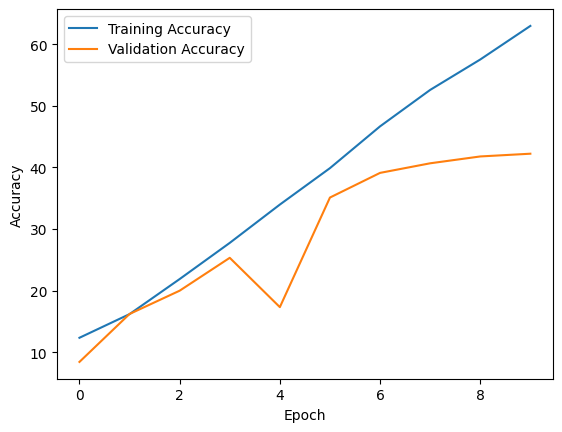

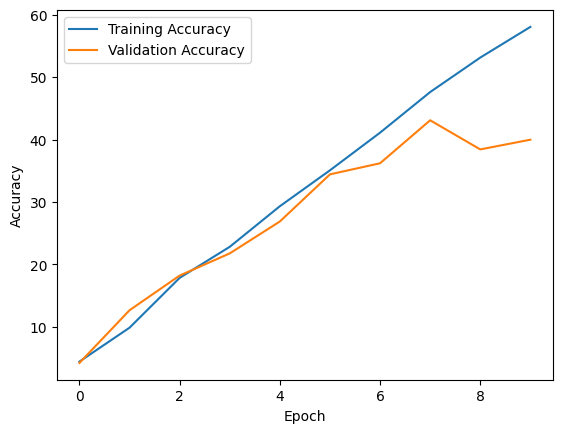

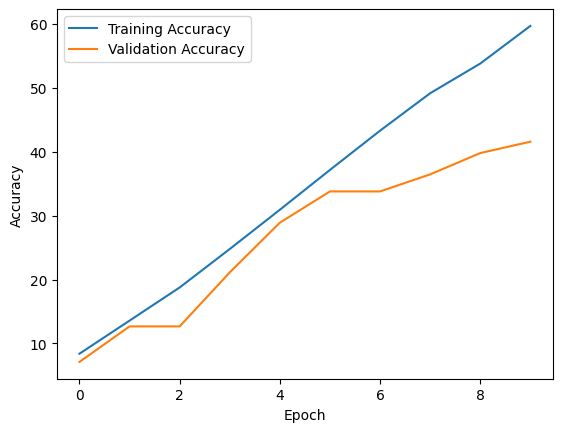

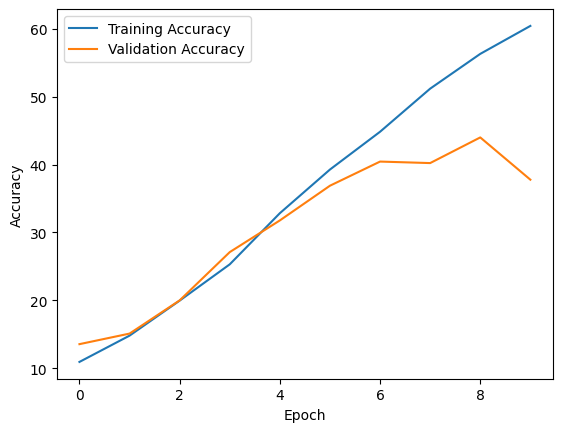

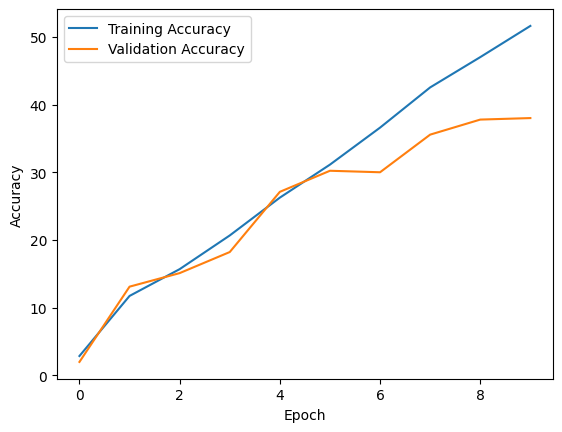

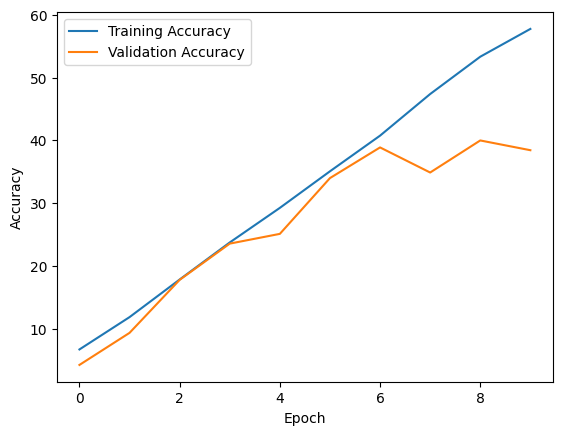

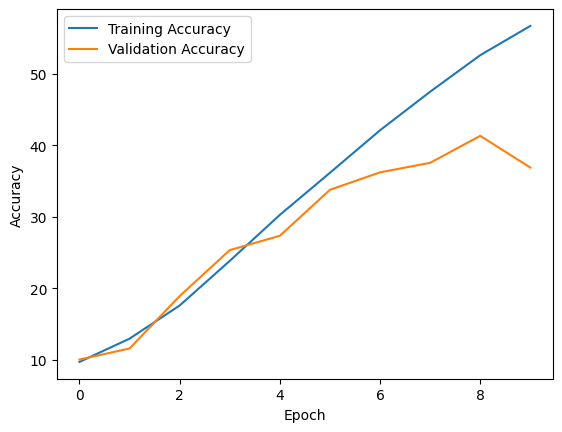

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# for param in model.parameters():
#     param = param.to(device)

# 訓練循環
epochs = 10  # 設定訓練輪數

traing_acc_3c = []
val_acc_3c = []

traing_acc_RG = []
val_acc_RG = []

traing_acc_RB = []
val_acc_RB = []

traing_acc_GB = []
val_acc_GB = []

traing_acc_R = []
val_acc_R = []

traing_acc_G = []
val_acc_G = []

traing_acc_B = []
val_acc_B = []

for epoch in range(epochs):
    model.train()  # 將模型設置為訓練模式

    train(model,train_R_loader,val_R_loader,criterion,optimizer,traing_acc_R,val_acc_R,epoch,"R")
    train(model,train_RG_loader,val_RG_loader,criterion,optimizer,traing_acc_RG,val_acc_RG,epoch,"RG")
    train(model,train_G_loader,val_G_loader,criterion,optimizer,traing_acc_G,val_acc_G,epoch,"G")
    train(model,train_GB_loader,val_GB_loader,criterion,optimizer,traing_acc_GB,val_acc_GB,epoch,"GB")
    train(model,train_B_loader,val_B_loader,criterion,optimizer,traing_acc_B,val_acc_B,epoch,"B")
    train(model,train_RB_loader,val_RB_loader,criterion,optimizer,traing_acc_RB,val_acc_RB,epoch,"RB")
    train(model,train_3c_loader,val_3c_loader,criterion,optimizer,traing_acc_3c,val_acc_3c,epoch,"RGB")

    
    
plot_acc(traing_acc_3c,val_acc_3c,"RGB")
plot_acc(traing_acc_RG,val_acc_RG,"RG")
plot_acc(traing_acc_GB,val_acc_GB,"GB")
plot_acc(traing_acc_RB,val_acc_RB,"RB")
plot_acc(traing_acc_R,val_acc_R,"R")
plot_acc(traing_acc_G,val_acc_G,"G")
plot_acc(traing_acc_B,val_acc_B,"B")


In [13]:
def test(model,dataloader,channel = "RGB"):
    correct = 0
    total = 0
    for inputs, labels in tqdm(dataloader, desc="Evaluating"):
        inputs, labels = inputs.float().to(device), labels.float().to(device)
        labels = labels.argmax(dim=1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"{channel}-channel Test Accuracy: {accuracy:.4f}")

In [14]:

model.eval()

#test_RGB
test(model,test_3c_loader,"RGB")

#test RG
test(model,test_RG_loader,"RG")

#test RB
test(model,test_RB_loader,"RB")

#test GB
test(model,test_GB_loader,"GB")

#test R
test(model,test_R_loader,"R")

#test G
test(model,test_G_loader,"G")

#test R
test(model,test_B_loader,"B")

Evaluating: 100%|██████████| 4/4 [00:00<00:00, 33.83it/s]


RGB-channel Test Accuracy: 0.4533


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 41.93it/s]


RG-channel Test Accuracy: 0.3956


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 41.67it/s]


RB-channel Test Accuracy: 0.4267


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 41.56it/s]


GB-channel Test Accuracy: 0.4000


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 43.10it/s]


R-channel Test Accuracy: 0.3889


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 43.08it/s]


G-channel Test Accuracy: 0.4267


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 43.18it/s]

B-channel Test Accuracy: 0.3844


In [15]:
torch.save(model, './model/HW2-1/myModel/myModel.pth')